# Manifold Sculpting
### Giovanni Canali, 22 December 2023

Manifold sculpting is an iterative manifold learning technique which aims to find a projection of the data in a lower dimensional space, 

while preserving the original relationships between data points. Intuitively, it simulates surface tension.

### Pseudocode:
1. For each data point, find its k-nearest neighbors.
2. For each data point, compute the distances to their k-nearest neighbors, and the angles formed with the most collinear element w.r.t. each neighbor.
3. Rotate data by applying principal component analysis.
4. Iterate:
    - scale data in non-preserved dimensions
    - adjust data to restore original relationships
5. Project data.

![GIF Example](images/swiss_roll.gif)

The most important parameters are `n_neigh` and `sigma`: while the first creates a net simulating surface tension, the latter determines the scaling pace.

While higher values of `n_neigh` result in lower manifold flexibility, lower choices of `n_neigh` might lead to structural loss.

Similarly, it is important to find the optimal value of `sigma` to ensure convergence without deforming too much the manifold.

### Comparisons

We compare the following manifold learning techniques:
- manifold sculpting
- isomap
- t-SNE
- UMAP
- Locally-linear embedding

Comparisons are carried out on two different datasets: swiss-roll and s-curve.

Notice that manifold sculpting and isomap were self-implemented.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import manifold_sculpting as MS
import utils
import isomap
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from umap import UMAP

## Swiss-roll dataset

We begin our comparisons by focusing on the swiss-roll dataset, described by the following system of equations:

$
\begin{cases}
    x_i & = t\cdot sin(t) \\
    y_i & = t\cdot cos(t) \\
    z_i & = \mathcal{U}(-6,6) \\
    t & = \frac{8\cdot i}{n} +2 \\
\end{cases}
$

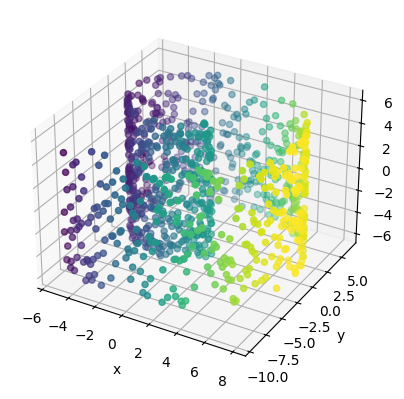

In [2]:
# Create and visualize swiss-roll dataset
swissroll = utils.swiss_roll(1000)

axes = plt.axes(projection='3d')
axes.scatter3D(swissroll[:,0], swissroll[:,1], swissroll[:,2], c=swissroll[:,0])
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')
plt.show()

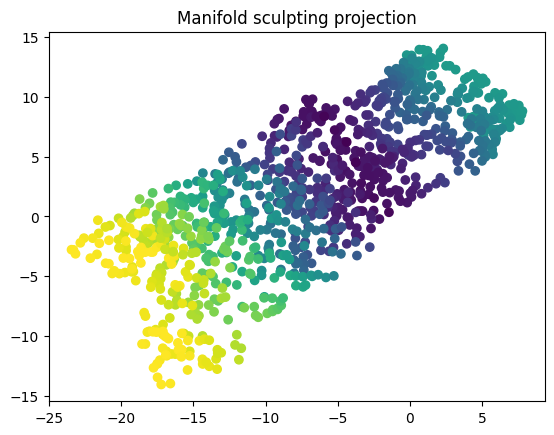

In [3]:
# manifold sculpting
manifold_swiss = MS.ManifoldSculpting(data=swissroll, n_neigh=10, n_iter=100, d=None, sigma=0.95)
manifold_swiss.fit()

plt.scatter(manifold_swiss.projected_data[:,0], manifold_swiss.projected_data[:,1], c=swissroll[:,0])
plt.title("Manifold sculpting projection")
plt.show()

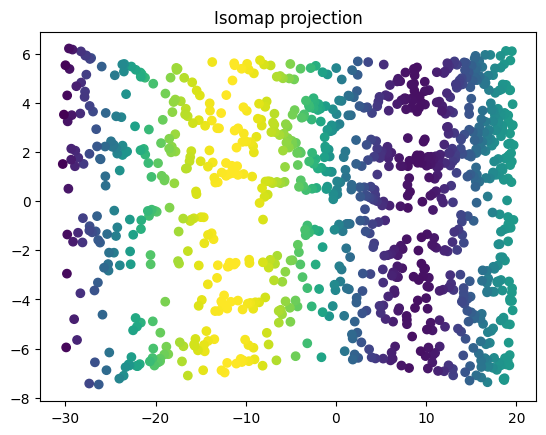

In [4]:
# isomap
isomap_swiss = isomap.isomap(swissroll, d=2, k=10)
plt.scatter(isomap_swiss[:,0], isomap_swiss[:,1], c=swissroll[:,0])
plt.title("Isomap projection")
plt.show()

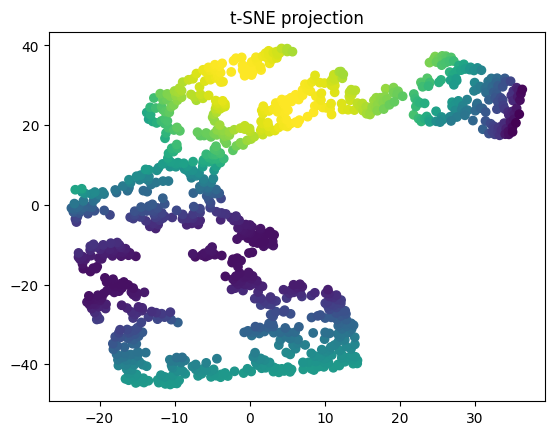

In [5]:
# t-SNE
tsne_swiss = TSNE(n_components=2).fit_transform(swissroll)
plt.scatter(tsne_swiss[:,0], tsne_swiss[:,1], c=swissroll[:,0])
plt.title("t-SNE projection")
plt.show()

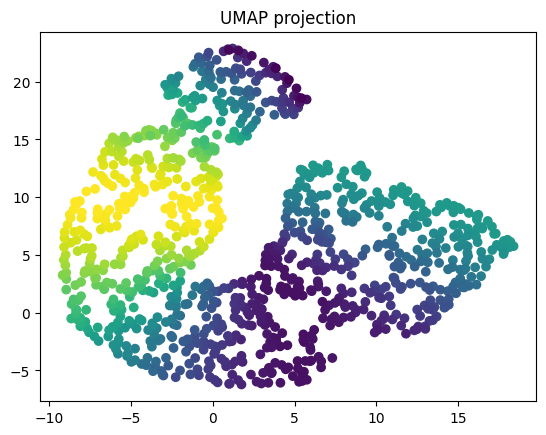

In [67]:
# UMAP
umap_swiss = UMAP(n_components=2, n_neighbors=10, min_dist = 1).fit_transform(swissroll)
plt.scatter(umap_swiss[:,0], umap_swiss[:,1], c=swissroll[:,0])
plt.title("UMAP projection")
plt.show()

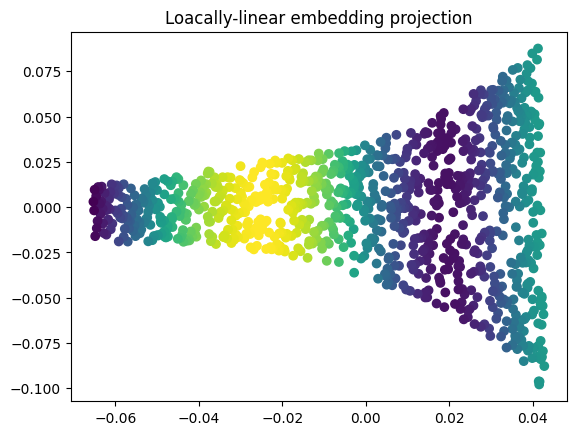

In [7]:
# Locally-linear embedding
lle_swiss = LocallyLinearEmbedding(n_neighbors=10, n_components=2).fit_transform(swissroll)
plt.scatter(lle_swiss[:,0], lle_swiss[:,1], c=swissroll[:,0])
plt.title("Loacally-linear embedding projection")
plt.show()

### Summary: swiss-roll

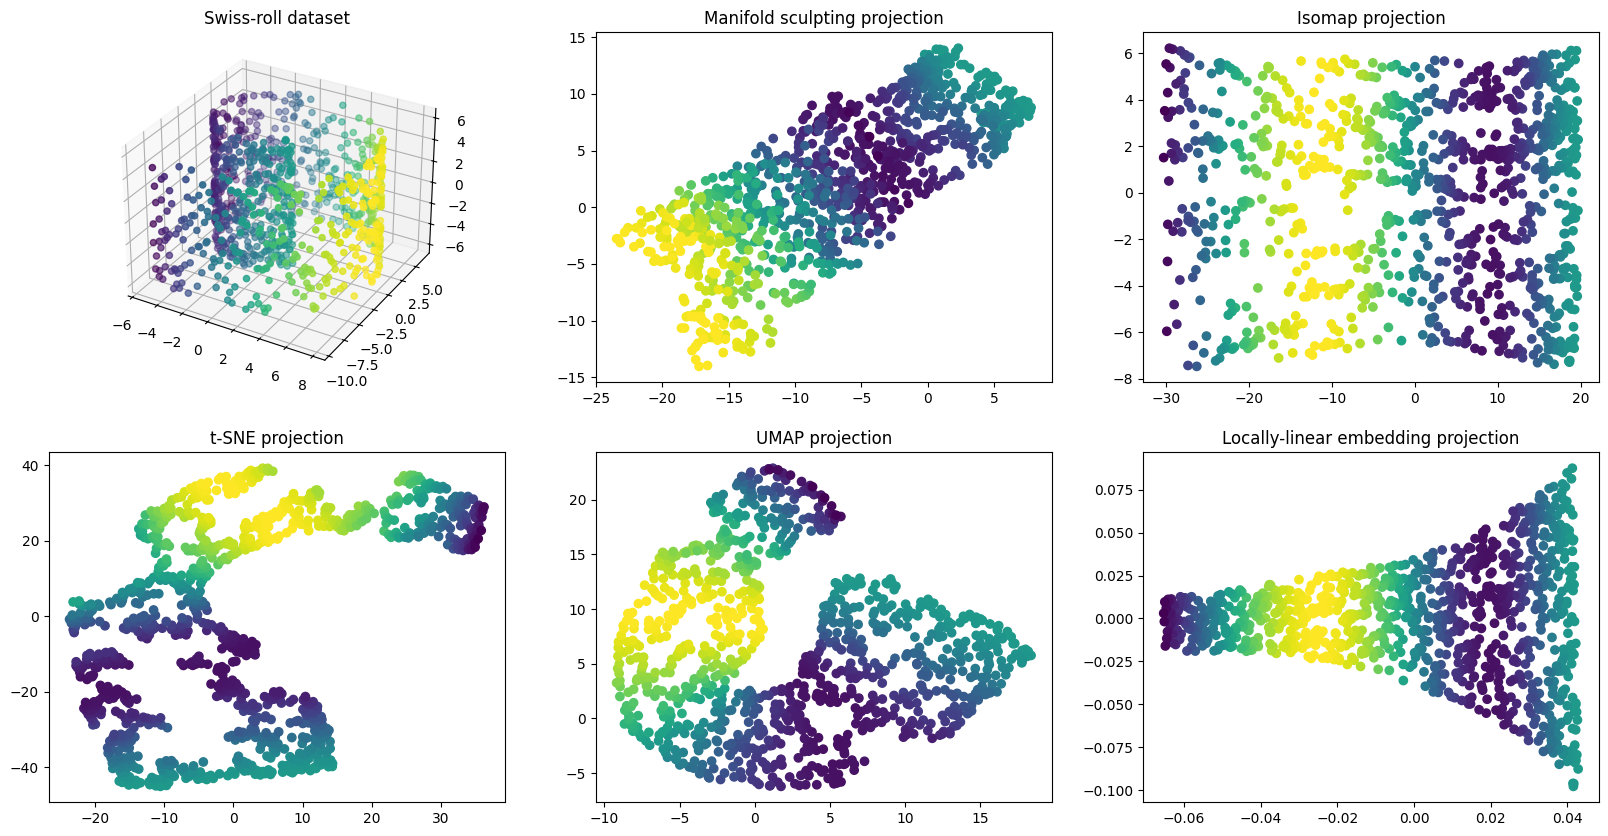

In [85]:
# Summary
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(231, projection='3d')
ax.scatter3D(swissroll[:,0], swissroll[:,1], swissroll[:,2], c=swissroll[:,0])
ax.set_title('Swiss-roll dataset')

ax = fig.add_subplot(232)
ax.scatter(manifold_swiss.projected_data[:,0], manifold_swiss.projected_data[:,1], c=swissroll[:,0])
ax.set_title('Manifold sculpting projection')

ax = fig.add_subplot(233)
ax.scatter(isomap_swiss[:,0], isomap_swiss[:,1], c=swissroll[:,0])
ax.set_title('Isomap projection')

ax = fig.add_subplot(234)
ax.scatter(tsne_swiss[:,0], tsne_swiss[:,1], c=swissroll[:,0])
ax.set_title('t-SNE projection')

ax = fig.add_subplot(235)
ax.scatter(umap_swiss[:, 0], umap_swiss[:, 1], c=swissroll[:,0])
ax.set_title('UMAP projection')

ax = fig.add_subplot(236)
ax.scatter(lle_swiss[:,0], lle_swiss[:,1], c=swissroll[:,0])
ax.set_title('Locally-linear embedding projection')

plt.show()

## S-curve dataset

We continue our analysis by moving to the S-curve dataset, described by the following system of equations:

$
\begin{cases}
    x_i & = \mathcal{U}(-1,1) \\
    y_i & = 3\cdot sin(z_i) \\
    z_i & = \frac{\pi}{n}\cdot (2.2\cdot i - 0.1) \\
\end{cases}
$

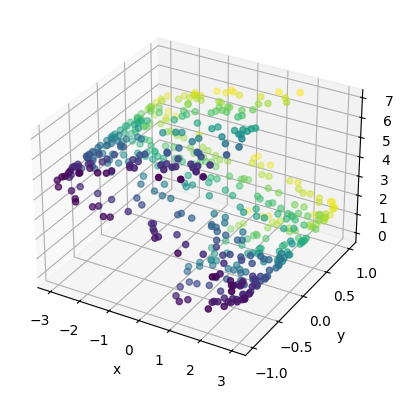

In [52]:
# Create and visualize S-curve dataset
scurve = utils.s_curve(500)

axes = plt.axes(projection='3d')
axes.scatter3D(scurve[:,1], scurve[:,0], scurve[:,2], c=scurve[:,0])
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')
plt.show()

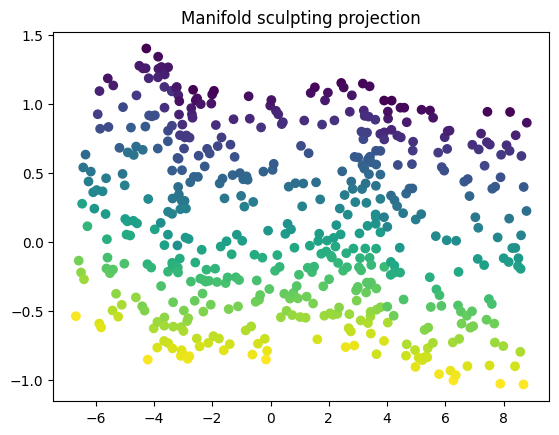

In [53]:
# manifold sculpting
manifold_scurve = MS.ManifoldSculpting(data=scurve, n_neigh=20, n_iter=100, d=None, sigma=0.97)
manifold_scurve.fit()

plt.scatter(manifold_scurve.projected_data[:,0], manifold_scurve.projected_data[:,1], c=scurve[:,0])
plt.title("Manifold sculpting projection")
plt.show()

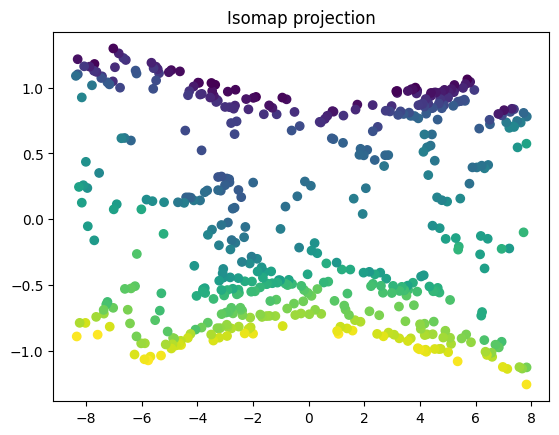

In [54]:
# isomap
isomap_scurve = isomap.isomap(scurve, d=2, k=10)
plt.scatter(isomap_scurve[:,0], isomap_scurve[:,1], c=scurve[:,0])
plt.title("Isomap projection")
plt.show()

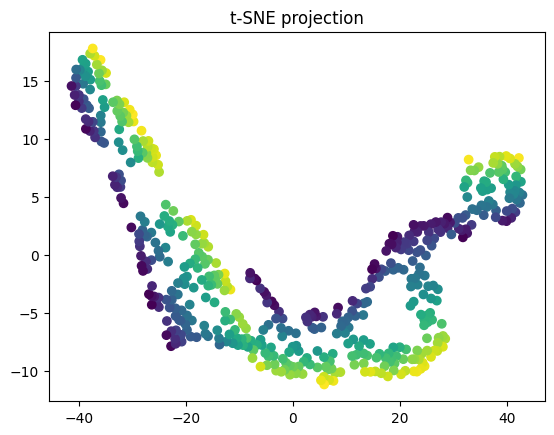

In [55]:
# t-SNE
tsne_scurve = TSNE(n_components=2).fit_transform(scurve)
plt.scatter(tsne_scurve[:,0], tsne_scurve[:,1], c=scurve[:,0])
plt.title("t-SNE projection")
plt.show()

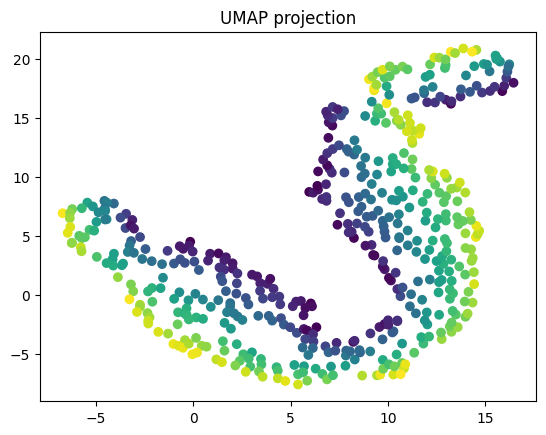

In [72]:
# UMAP
umap_scurve = UMAP(n_components=2, n_neighbors=10, min_dist=1).fit_transform(scurve)
plt.scatter(umap_scurve[:,0], umap_scurve[:,1], c=scurve[:,0])
plt.title("UMAP projection")
plt.show()

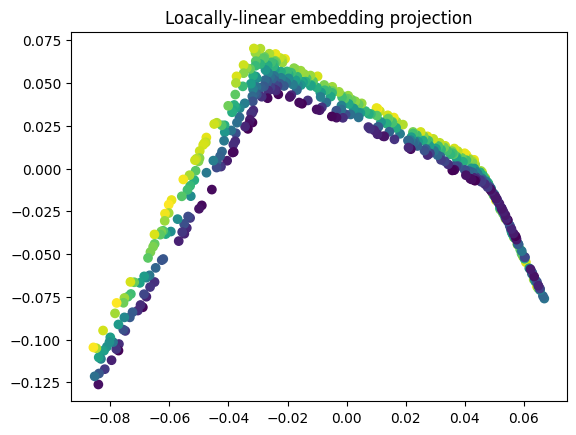

In [57]:
# Locally-linear embedding
lle_scurve = LocallyLinearEmbedding(n_neighbors=10, n_components=2).fit_transform(scurve)
plt.scatter(lle_scurve[:,0], lle_scurve[:,1], c=scurve[:,0])
plt.title("Loacally-linear embedding projection")
plt.show()

### Summary: S-curve

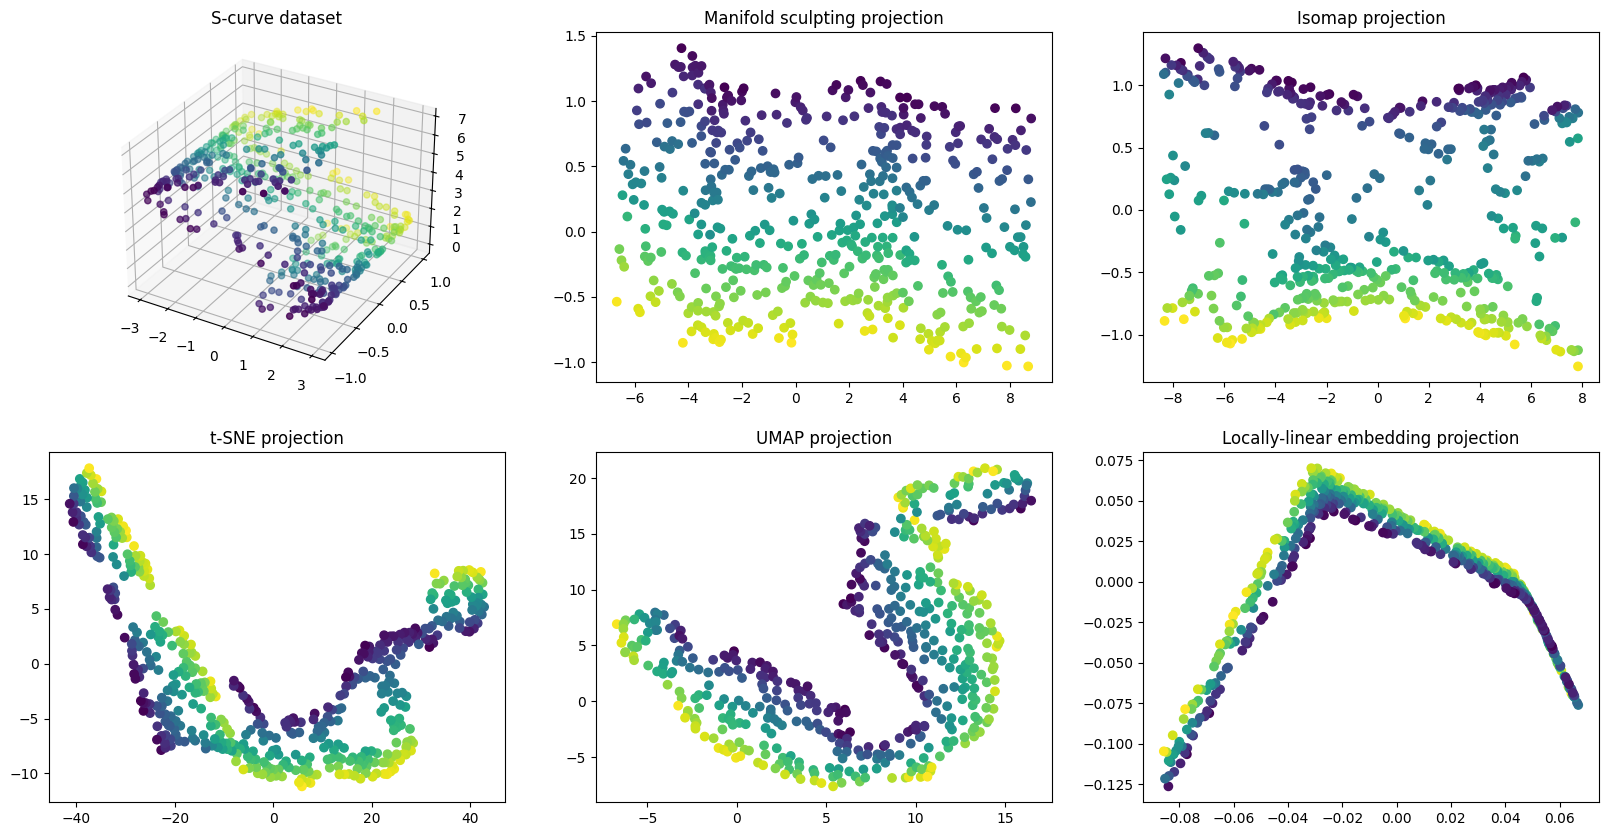

In [84]:
# Summary
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(231, projection='3d')
ax.scatter3D(scurve[:,1], scurve[:,0], scurve[:,2], c=scurve[:,0])
ax.set_title('S-curve dataset')

ax = fig.add_subplot(232)
ax.scatter(manifold_scurve.projected_data[:,0], manifold_scurve.projected_data[:,1], c=scurve[:,0])
ax.set_title('Manifold sculpting projection')

ax = fig.add_subplot(233)
ax.scatter(isomap_scurve[:,0], isomap_scurve[:,1], c=scurve[:,0])
ax.set_title('Isomap projection')

ax = fig.add_subplot(234)
ax.scatter(tsne_scurve[:,0], tsne_scurve[:,1], c=scurve[:,0])
ax.set_title('t-SNE projection')

ax = fig.add_subplot(235)
ax.scatter(umap_scurve[:, 0], umap_scurve[:, 1], c=scurve[:,0])
ax.set_title('UMAP projection')

ax = fig.add_subplot(236)
ax.scatter(lle_scurve[:,0], lle_scurve[:,1], c=scurve[:,0])
ax.set_title('Locally-linear embedding projection')

plt.show()